In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [122]:
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
cmap2 = cm.get_cmap('twilight',13)
colors1 = []
for i in range(cmap2.N):
    rgb = cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

In [14]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [15]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [16]:
df.shape

(3803, 23)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [18]:
df.duplicated().sum()

126

In [19]:
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [9]:
df.shape

(3677, 23)

## Univariate Analysis

### 1) property_type

<AxesSubplot: >

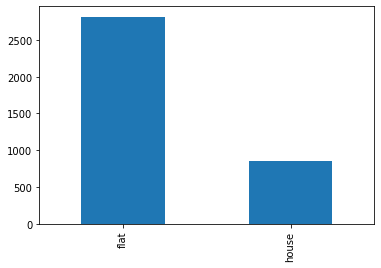

In [11]:
df['property_type'].value_counts().plot(kind='bar')

**Observations**
- Flats are in majority(75%) and there are less number of houses(25%)
- No missing values

### 2) Society

In [21]:
df['society'].value_counts().shape

(676,)

In [22]:
df['society'].value_counts()

independent                                          486
tulip violet                                          75
ss the leaf                                           73
dlf new town heights                                  42
shapoorji pallonji joyville gurugram                  42
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
paras dews                                            31
dlf the ultima                                        31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
la vida by tata housing                               28
smart world gems                                      28
godrej nature plus                                    27
signature global solera        

In [27]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
shree vardhman victoria                 0.094357
smart world orchard                     0.104389
emaar mgf emerald floors premier        0.114420
paras dews                              0.124138
dlf the ultima                          0.133856
m3m woodshire                           0.143260
dlf regal gardens                       0.152665
shree vardhman flora                    0.161755
la vida by tata housing                 0.170533
smart world gems                        0.179310
godrej nature plus                      0.187774
signature global solera                 0.196238
bptp terra                              0.204075
tata primanti                           0.211599
vatika gurgaon                          0.219122
experion the heartso

In [30]:
society_counts = df['society'].value_counts()

#frequency distribution for societies

frequency_bins = {
    "Very High (>100)" : (society_counts >100).sum(),
    "High(50-100)" : ((society_counts >= 50) & (society_counts <=100)).sum(),
    "Average(10-49)" : ((society_counts >=10) & (society_counts < 50)).sum(),
    "Low (2-9)" : ((society_counts > 1) & (society_counts < 10)).sum(),
    "very Low(1)" : (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High(50-100)': 2,
 'Average(10-49)': 92,
 'Low (2-9)': 273,
 'very Low(1)': 308}

<AxesSubplot: >

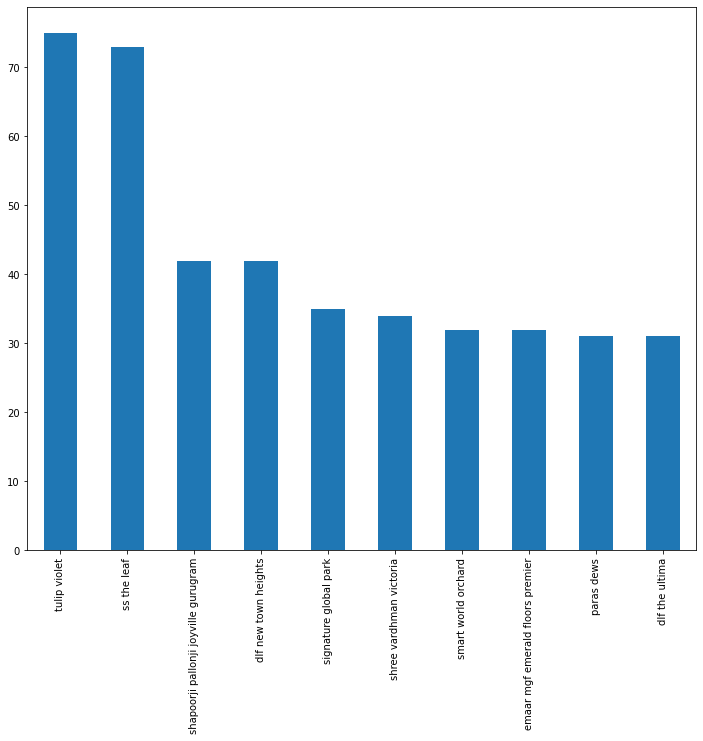

In [33]:
#Top 10 societies
plt.figure(figsize=(12,10))
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [34]:
df['society'].isnull().sum()

1

In [35]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


**Observations**

- Around 13% properties comes under independent tag
- There are 675 societies
- The top 75 societies have 50% of the properties and the rest 50% of the properties comes under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High(50-100) : 2 Societies have between 50 to 100 listings
    - Average(10-49): 92 societies fall in the range with 10 to 49 listings each.
    - Low(2-9): 273 societies have between 2 to 9 listings.
    - Very Low(1): A significant number, 308 societies have only 1 listing,
- 1 Missing Value

### 3) Sector

In [38]:
#unique sectors
df['sector'].value_counts().shape

(104,)

<AxesSubplot: >

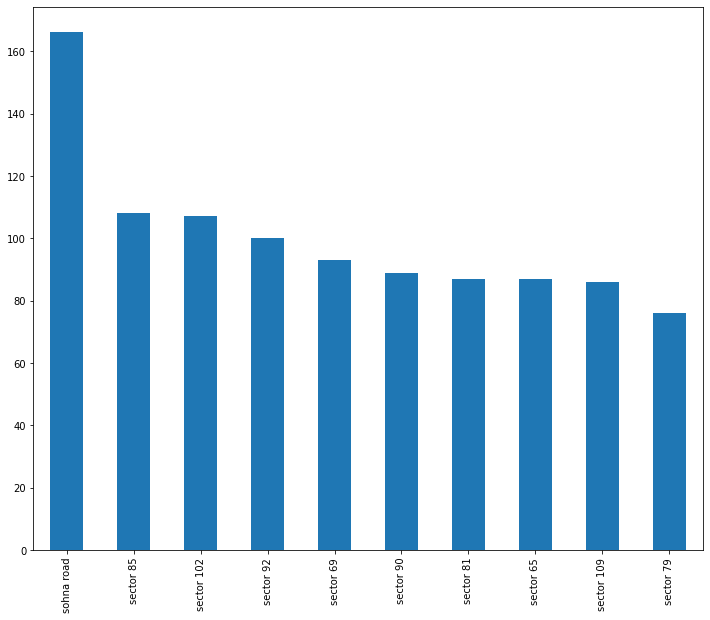

In [40]:
#Top 10 sectors
plt.figure(figsize = (12,10))
df['sector'].value_counts().head(10).plot(kind = 'bar')

In [42]:
#frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "very High (>100)" : (sector_counts >100).sum(),
    "High (50-100)" : ((sector_counts >=50) & (sector_counts <=100)).sum(),
    "Average (10-49)" : ((sector_counts >= 10) & (sector_counts <50)).sum(),
    "Low (2-9)" : ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "very Low (1)": (sector_counts == 1).sum()
}
sector_frequency_bins

{'very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 60,
 'Low (2-9)': 16,
 'very Low (1)': 0}

In [43]:
df['sector'].value_counts()

sohna road           166
sector 85            108
sector 102           107
sector 92            100
sector 69             93
sector 90             89
sector 81             87
sector 65             87
sector 109            86
sector 79             76
sector 104            69
sector 33             69
sector 83             68
sector 43             65
sector 50             64
sector 86             64
sector 37d            63
sector 95             62
sector 2              62
sector 107            60
sector 108            59
sector 89             57
sector 56             56
sector 48             55
sector 70a            54
sector 37             52
sector 26             50
sector 70             50
sector 4              49
sector 84             49
sector 49             48
sector 67             47
sector 66             46
sector 28             44
sector 113            43
sector 25             42
sector 99             42
sector 103            42
sector 61             41
sector 82             41


**Observations**

- There are a total of 104 unique sectors in the dataset
- frequency distribution of sectors:
    - Very high (>100): 3sectors have more than 100 listings
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1) : Interestingly, there is no sectors with only 1 listings.

### 4)  Price

In [44]:
df['price'].isnull().sum()

17

In [45]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

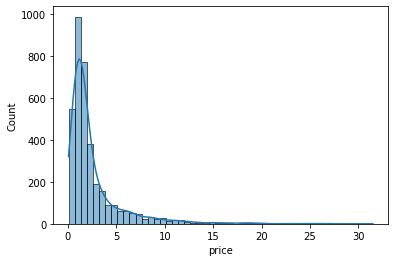

In [46]:
sns.histplot(df['price'], kde=True, bins=50)

<AxesSubplot: xlabel='price'>

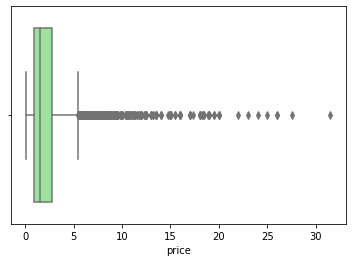

In [47]:
sns.boxplot(x = df['price'], color = 'lightgreen')

- **Descriptive Statistics**:
    - Count: There are 3,600 non-missing entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median  (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range(difference between 75th and 25th percentile) is from 0.95 crore to 2.75 crores.
        
- **Visualizations**:
    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores) with a few 
        properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 
        10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
      
      
- Missing Values: There are 17 misiing values in the price column.

In [50]:
#Skewnwss and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2791704733134623 14.933372629214258


- **Skewness**: The pricee distribution has a skewnwss of approxiamtely 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high- prices properties.


- **Kutosis**: The kurtosis value is approxiamtely 14.93. A kutosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normak distribution.    

In [51]:
#quartile Analysis
quantiles = df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

- **Quantile Analysis**:
    - 1% Quantile: Only 1% of properties are priced below 0.25crores.
    - 5% Quantile : 5% of Properties are priced below 0.37crores.
    - 95% Quantile : 95% of Properties are price below 8.5 crores
    - 99% Quantile: 99% of Properties are priced below 15.26 crores, indicating that very few properties are priced above this value.





In [57]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3-Q1

IQR

1.8

In [58]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [60]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [61]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

- **Outliers Analysis(Using IQR method)**:
    - Based on the IQR method, there are 425 properties considered as outliers.
    - These outliers have an average price of approximately 9.24 crores.
    - The range for these outliers is from 5.46 crores to 31.5 crores. 

<AxesSubplot: >

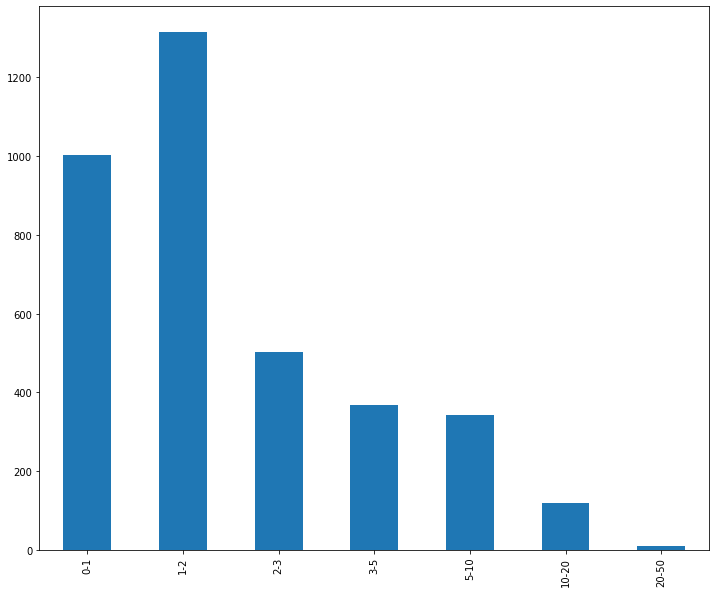

In [68]:
#Price Binning
plt.figure(figsize=(12,10))
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bins_label = ['0-1', '1-2','2-3','3-5','5-10','10-20','20-50']
pd.cut(df['price'], bins = bins, labels= bins_label, right= False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are price in the "1-2 crores" and "2-3 crores" ranges.
- There is a significant drop in the number of properties priced above "5 crores".

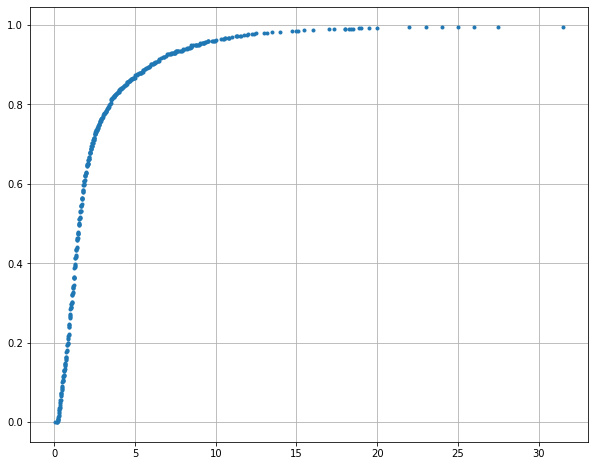

In [72]:
#ecdf plot
plt.figure(figsize=(10,8))
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

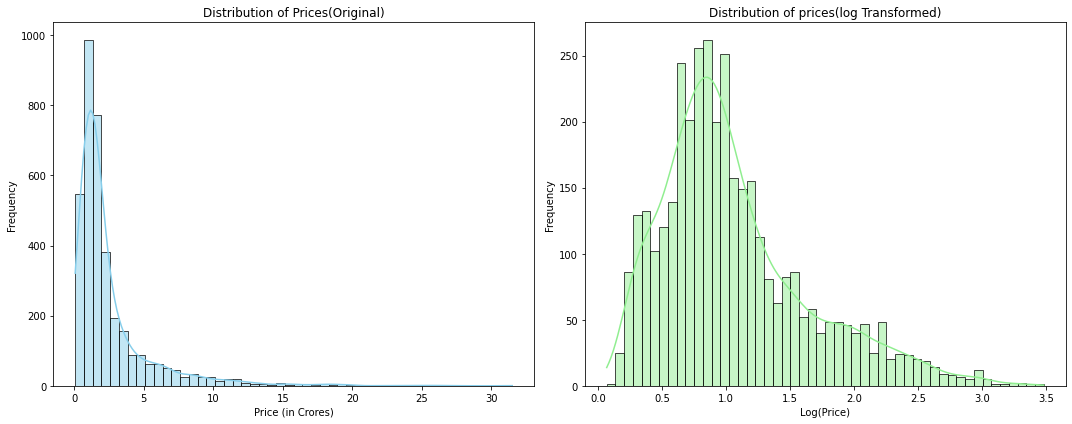

In [74]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color = 'skyblue')
plt.title('Distribution of Prices(Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title("Distribution of prices(log Transformed)")
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for value of x that are very close to zero.


- Using np.log1p helps in transforming the price column while ensuring that any value(including zero, if present) is handled appropriately.When we need to reverse the transformation, we can use np.expm1 which computes e^x-1


In [75]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.0740709565255315 0.9646692415449296


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


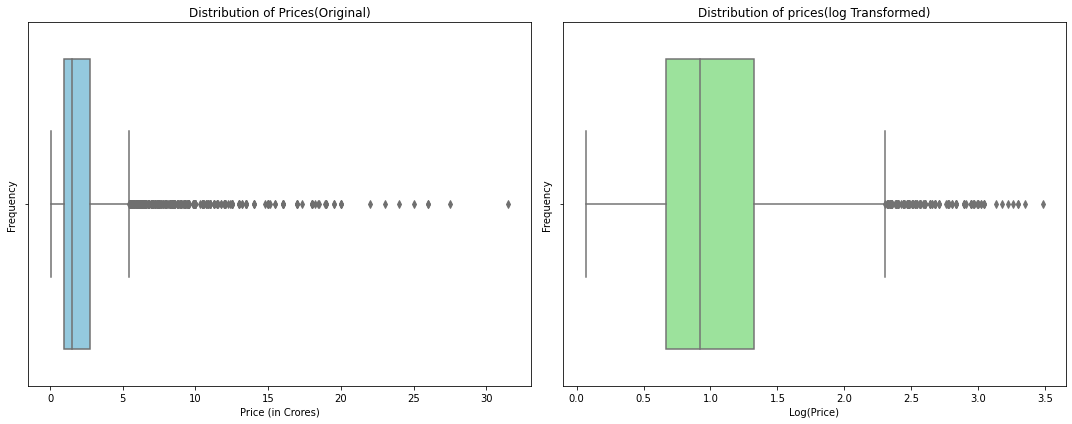

In [77]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color = 'skyblue')
plt.title('Distribution of Prices(Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title("Distribution of prices(log Transformed)")
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 5) Price_per_sqft

In [88]:
df[['price_per_sqft']]

,price_per_sqft
0,7585.0
1,8600.0
2,79.0
3,5470.0
4,8020.0
5,9022.0
6,14018.0
7,8554.0
8,9105.0
9,10122.0


In [78]:
df['price_per_sqft'].isnull().sum()

17

In [79]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<AxesSubplot: xlabel='price_per_sqft', ylabel='Count'>

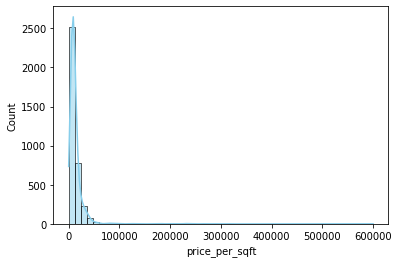

In [80]:
sns.histplot(df['price_per_sqft'], bins = 50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='price_per_sqft'>

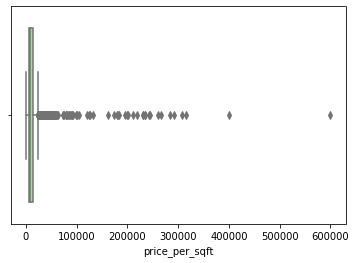

In [81]:
sns.boxplot(df['price_per_sqft'], color = 'lightgreen')

<AxesSubplot: >

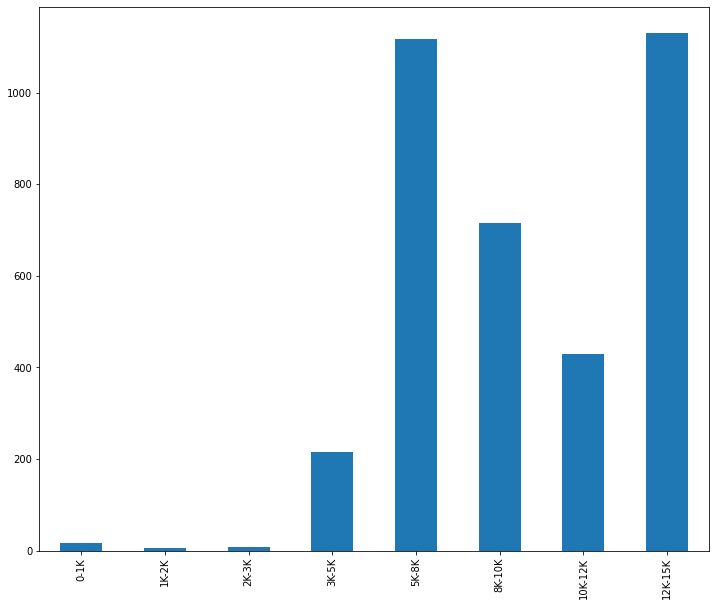

In [91]:
#Price Binning
plt.figure(figsize=(12,10))
bins = [0, 1000, 2000, 3000, 5000, 8000, 10000,12000, 150000]
bins_label = ['0-1K', '1K-2K','2K-3K','3K-5K','5K-8K','8K-10K','10K-12K', '12K-15K']
pd.cut(df['price_per_sqft'], bins = bins, labels= bins_label, right= False).value_counts().sort_index().plot(kind='bar')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range(IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers.

- **Observations**:
    - Potential Outliers
    - Right Skewed
    - 17 missing value


### 6) bedRoom

In [83]:
df['bedRoom'].isnull().sum()

0

<AxesSubplot: >

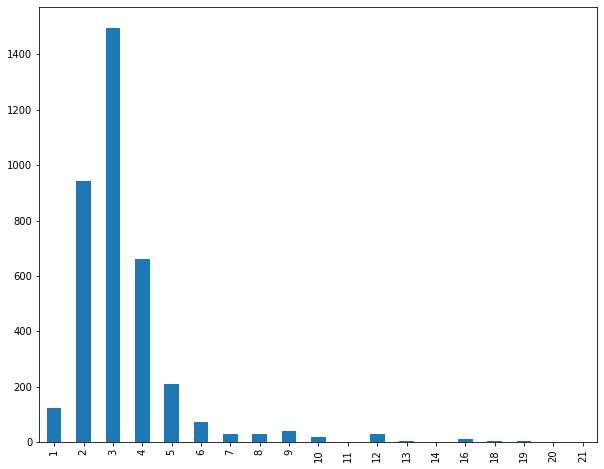

In [87]:
plt.figure(figsize=(10,8))
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot: ylabel='bedRoom'>

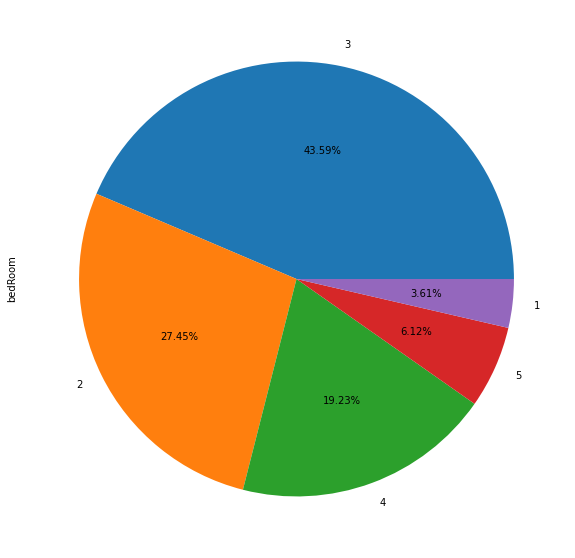

In [95]:
plt.figure(figsize=(12,10))
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct="%0.2f%%")


## 7)Bathroom

In [96]:
df['bathroom'].isnull().sum()

0

<AxesSubplot: >

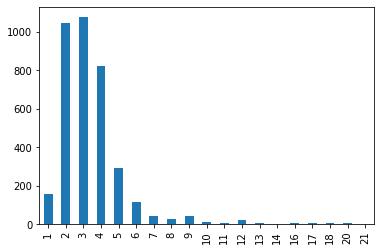

In [98]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot: ylabel='bathroom'>

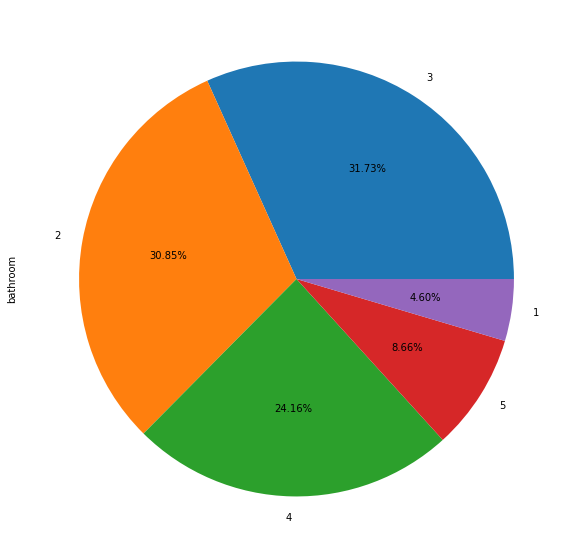

In [100]:
plt.figure(figsize=(12,10))
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

In [101]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


## 8) balcony

In [102]:
df['balcony'].isnull().sum()

0

In [109]:
df['balcony'].describe()

count     3677
unique       5
top         3+
freq      1172
Name: balcony, dtype: object

<AxesSubplot: >

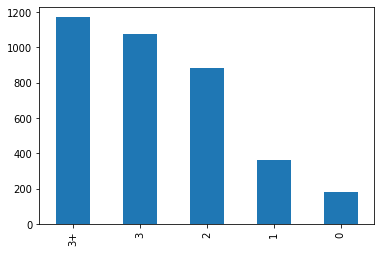

In [103]:
df['balcony'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='balcony'>

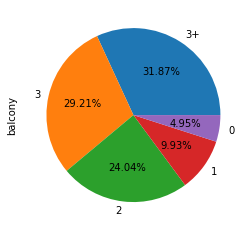

In [115]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie', autopct='%0.2f%%')

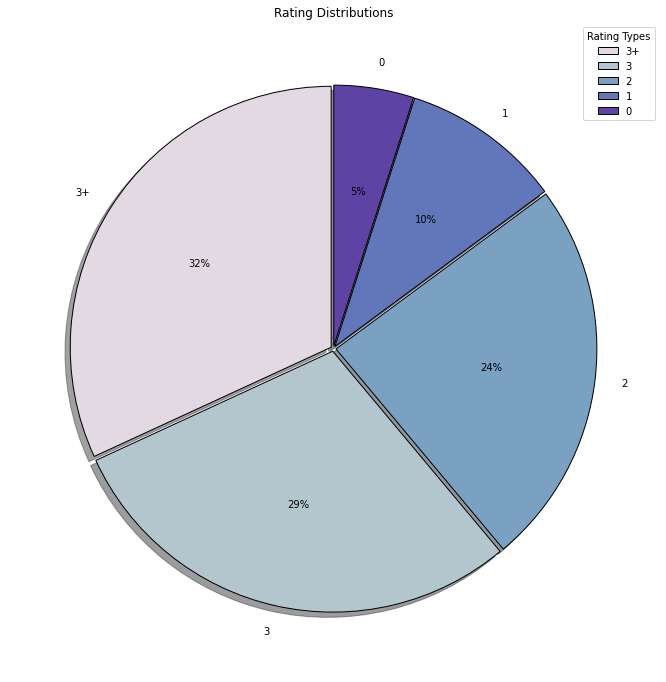

In [125]:
plt.figure(figsize=(18,12))
balcony =df['balcony'].value_counts(normalize=True).head()
plt.pie(x=balcony, labels=balcony.index, autopct='%.0f%%', colors=colors1,
       explode=[0.01 for i in balcony.index], startangle=90, wedgeprops={'linewidth':1, 'edgecolor':'black'}, 
        shadow=True)
plt.title('Rating Distributions')
plt.legend(loc='upper right', title = 'Rating Types')
plt.show()

In [116]:
df['balcony'].value_counts(normalize=True).head()

3+    0.318738
3     0.292086
2     0.240413
1     0.099266
0     0.049497
Name: balcony, dtype: float64

## 9) Floornum

In [105]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [107]:
df['floorNum'].isnull().sum()

19

In [108]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<AxesSubplot: >

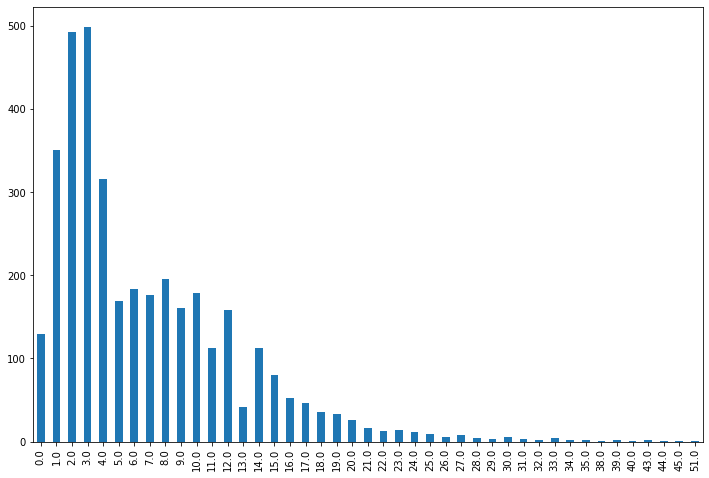

In [111]:
plt.figure(figsize=(12,8))
df['floorNum'].value_counts().sort_index().plot(kind='bar')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='floorNum'>

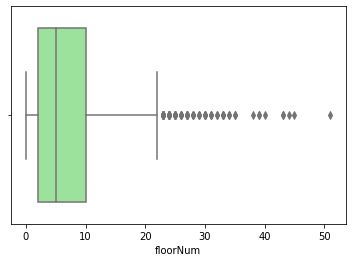

In [112]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floor 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range(IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the 'whiskers' of the box plot, especially on the higher side, indicate potential outliers.

### 10) Facing

In [113]:
df['facing'].isnull().sum()

1045

In [126]:
df['facing'].fillna('NA', inplace=True)

In [127]:
df['facing'].value_counts()

NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

## 11) agePossession

In [128]:
df['agePossession'].isnull().sum()

0

In [129]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: agePossession, dtype: int64

#  Areas

### 12)Super-Built-up Area

In [130]:

df['super_built_up_area'].isnull().sum()

1802

In [131]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot: xlabel='super_built_up_area', ylabel='Count'>

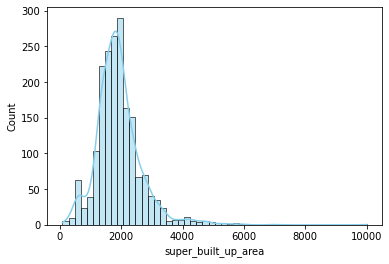

In [132]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='super_built_up_area'>

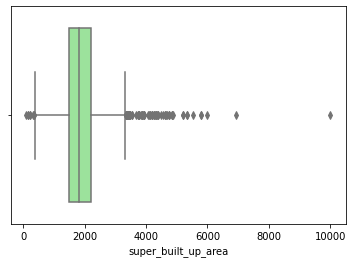

In [133]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built up area ranging between approximately 1,000 sqft and 2,500 sqft.

- There are a few properties with a significantly larger area, leading to a right skewed distribution.

- The interquartile range(IQR) lies between roughly 1,480 sqft and 2,215sqft, indicating that the middle 50% of the properties fall within this range.

- There are several data points beyond the upper 'whisker' of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [134]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,2.0,NA,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NA,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NA,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.),2,2,1,17.0,NA,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476 sq.ft. (137.12 sq.m.),3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


### 13) Built-up-Area

In [135]:
df['built_up_area'].isnull().sum()

1987

In [136]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<AxesSubplot: xlabel='built_up_area', ylabel='Count'>

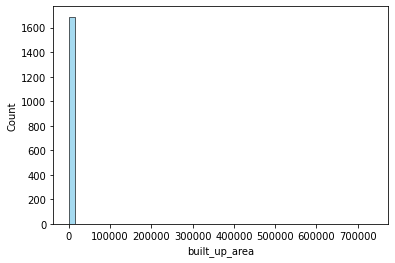

In [137]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<AxesSubplot: >

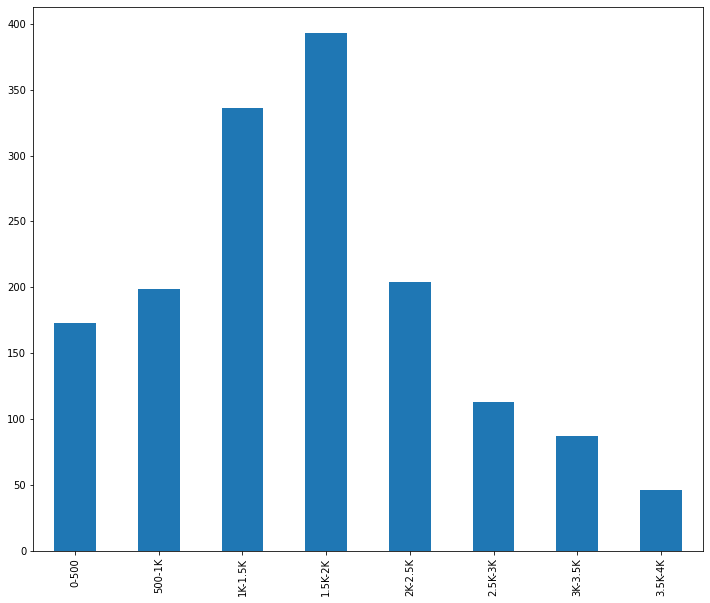

In [138]:
#built up area- Binning
plt.figure(figsize=(12,10))
bins = [0, 500, 1000, 1500, 2000, 2500, 3000,3500, 4000]
bins_label = ['0-500', '500-1K','1K-1.5K','1.5K-2K','2K-2.5K','2.5K-3K','3K-3.5K', '3.5K-4K']
pd.cut(df['built_up_area'], bins = bins, labels= bins_label, right= False).value_counts().sort_index().plot(kind='bar')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='built_up_area'>

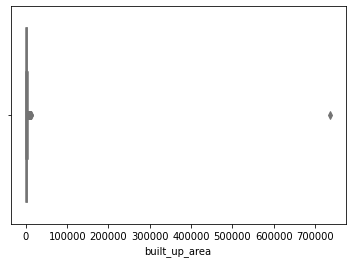

In [155]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500sqft and 3500sqft.
- There are very few properties with a much larger built-up area, leading to highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the 'whiskers' of the box plot are stretched due to outliers.

The presence of extreme values, especially on the higher side, suggests that there may be outlierss or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

### 14) carpet area

In [139]:

df['carpet_area'].isnull().sum()

1805

In [140]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<AxesSubplot: xlabel='carpet_area', ylabel='Count'>

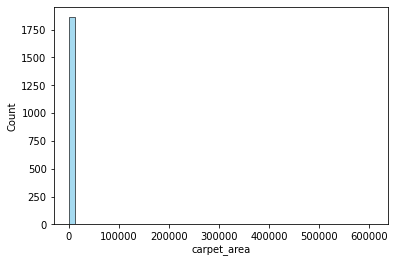

In [141]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='carpet_area'>

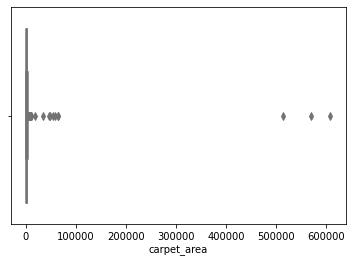

In [142]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [143]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,8
1,1,1,0,0,0,0,38
2,0,0,0,0,0,0,15
3,0,0,0,0,0,0,49
4,0,1,0,0,1,1,174
5,0,0,1,0,0,0,159
6,0,1,0,1,1,1,49
7,0,1,0,0,0,0,95
8,0,1,0,0,0,0,165
9,0,0,0,0,0,0,9


## Additional Room

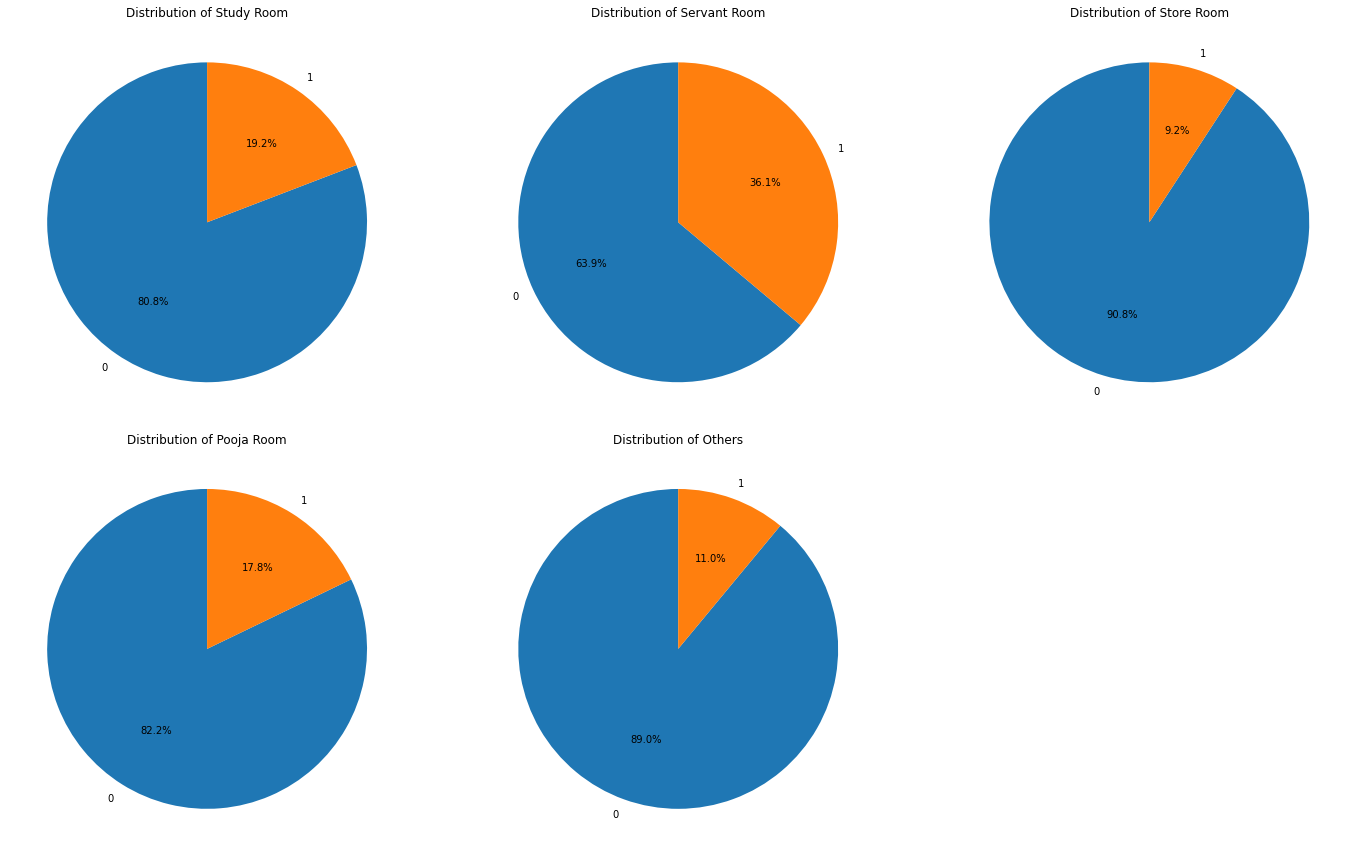

In [144]:
plt.figure(figsize=(20,12))

#create a subplot of pie chart for each room type

for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax = ax)
    plt.title(f"Distribution of {room.title()}")
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Furnishing Type

In [145]:
df['furnishing_type'].value_counts()

0    2411
1    1059
2     207
Name: furnishing_type, dtype: int64

<AxesSubplot: ylabel='furnishing_type'>

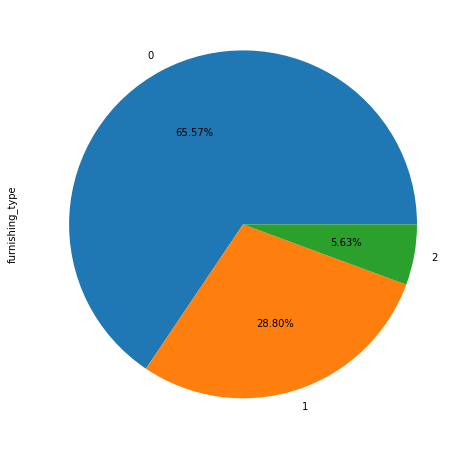

In [147]:
plt.figure(figsize=(10,8))
df['furnishing_type'].value_counts().plot(kind='pie', autopct='%0.2f%%')

## luxury score

In [148]:
df['luxury_score'].isnull().sum()

0

In [149]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<AxesSubplot: xlabel='luxury_score', ylabel='Count'>

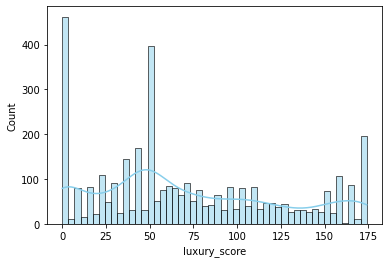

In [150]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='luxury_score'>

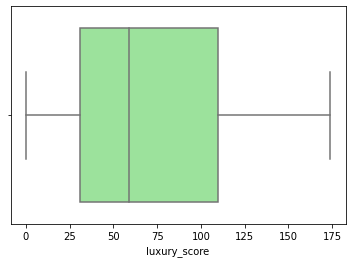

In [151]:
sns.boxplot(df['luxury_score'], color='lightgreen')

- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.